# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


In [6]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [7]:
# Import hvplot.pandas after pn.extension
# This avoids plotly initialization failure
import hvplot.pandas

In [8]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [9]:
# Import the CSVs to Pandas DataFrames
toronto_neighbourhoods = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(toronto_neighbourhoods, index_col="year")

toronto_coordinates = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(toronto_coordinates)
df_neighbourhood_locations.columns = ["Neighbourhood", "lat", "lon"]

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [10]:
# Getting the data from the top 10 expensive neighbourhoods
top_expensive = to_data.groupby(['neighbourhood'])["average_house_value"].mean()
top_expensive.sort_values(ascending=False, inplace=True)
top_ten_expensive = top_expensive.head(10)


# Calculate the mean number of dwelling types units per year
neighbourhood = to_data.groupby([to_data.index,'neighbourhood']).mean().reset_index()
neighbourhood_avg_type = neighbourhood.drop(columns=["average_house_value","shelter_costs_owned","shelter_costs_rented"])


# Calculate the average monthly shelter costs for owned and rented dwellings
avg_df = to_data.groupby("year").mean()
avg_cost_rent_own = avg_df[["shelter_costs_owned", "shelter_costs_rented"]].copy()

#pull in data from dwelling_type_per_year.csv

dwelling_type_csv_path = Path("dwelling_type_per_year.csv")
dwelling_type_per_year = pd.read_csv(dwelling_type_csv_path, index_col="year")

### Panel Visualization Functions

In [11]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    neighbourhood_mean = to_data.groupby(["neighbourhood"]).mean().reset_index()
    combined_df = pd.concat([df_neighbourhood_locations, neighbourhood_mean], axis="columns", join = "inner")
    combined_df.drop(columns=["neighbourhood"], inplace=True)  
    map_plot = px.scatter_mapbox(
        combined_df,
        lat="lat",
        lon="lon",
        size="average_house_value",
        color="average_house_value",
        zoom=10,
        title= "Average House Values in Toronto",
        width= 1200,
        height= 600,
        hover_name = "Neighbourhood",
        hover_data = combined_df.columns[3:14]
    )
    return map_plot

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    dwelling_type_csv_path = Path("dwelling_type_per_year.csv")
    dwelling_type_per_year = pd.read_csv(dwelling_type_csv_path, index_col="year")
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel, fontsize=12)
    bar_chart.set_ylabel(ylabel, fontsize=12)
    bar_chart.set_title(title, fontsize=14, fontweight="bold")    
    plt.close(fig)
    
    return fig

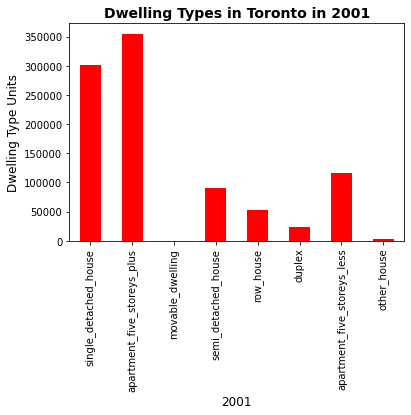

In [12]:
# barchart for 2001

bar_chart_2001 = create_bar_chart(dwelling_type_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")
bar_chart_2001

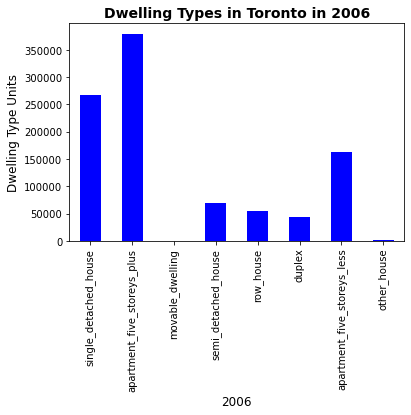

In [13]:
# Bar chart for 2006
bar_chart_2006 = create_bar_chart(dwelling_type_per_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")
bar_chart_2006

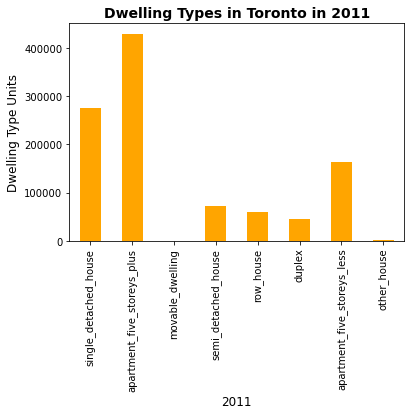

In [14]:
# Bar chart for 2011
bar_chart_2011 = create_bar_chart(dwelling_type_per_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")
bar_chart_2011

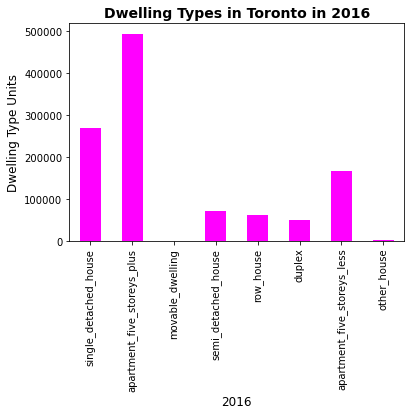

In [15]:
# Bar chart for 2016
bar_chart_2016 = create_bar_chart(dwelling_type_per_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")
bar_chart_2016

In [16]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    line_chart = data.plot.line(color=color)
    line_chart.set_xlabel(xlabel, fontsize=12)
    line_chart.set_ylabel(ylabel, fontsize=12)
    line_chart.set_title(title, fontsize=14, fontweight="bold")    
    plt.close(fig)
    
    return fig

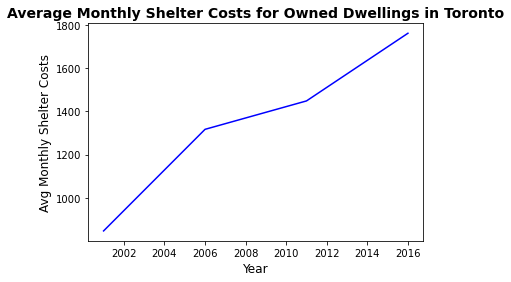

In [17]:
# Line chart for owned dwellings
avg_owned_cost = create_line_chart(avg_cost_rent_own["shelter_costs_owned"], 
    "Average Monthly Shelter Costs for Owned Dwellings in Toronto", 
    "Year", 
    "Avg Monthly Shelter Costs", 
    "blue")
avg_owned_cost

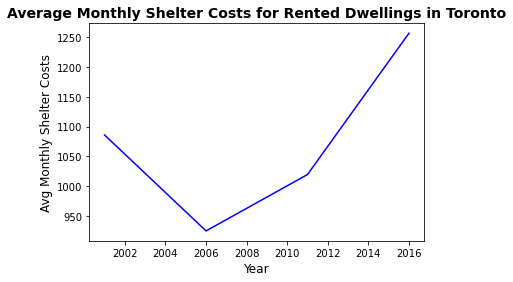

In [18]:
# line chart for rented dwellings
avg_rent_cost = create_line_chart(avg_cost_rent_own["shelter_costs_rented"], 
    "Average Monthly Shelter Costs for Rented Dwellings in Toronto", 
    "Year", 
    "Avg Monthly Shelter Costs", 
    "blue")
avg_rent_cost

In [58]:
# line chart for avg house value per year
def average_house_value():
    """Average house values per year."""
    avg_df = to_data.groupby("year").mean()
    average_house_value_df = avg_df["average_house_value"].copy()
    avg_house_value = average_house_value.hvplot.line(title='Average House Value in Toronto', ylabel = "Year", xlabel = "Avg. House Value", yformatter= "$%.0f")
    
    return avg_house_value
    

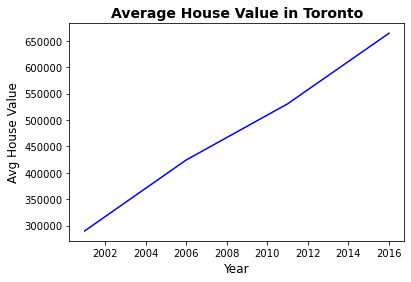

In [59]:
avg_house_value

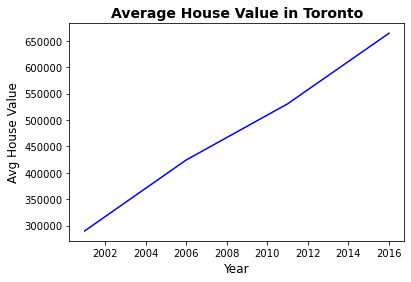

In [19]:
# line chart for avg house value per year
#average_house_value = avg_df["average_house_value"].copy()
#avg_house_value = create_line_chart(average_house_value,
    #"Average House Value in Toronto", 
    #"Year", 
    #"Avg House Value", 
    #"blue")
#avg_house_value

In [20]:
   


def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    neighbourhood_avg = neighbourhood[["year", "neighbourhood","average_house_value"].copy()]
    average_value_by_neighbourhood = neighbourhood_avg.hvplot.line(x='year', y=['average_house_value'], groupby="neighbourhood",ylabel='Avg House Value', subplots=True, yformatter='$%.0f',height=500,width=800)   
    
    return average_value_by_neighbourhood

def number_dwelling_types():
    """Number of dwelling types per year"""
    
    number_dwelling_types_plot = neighbourhood_avg_type.hvplot.bar(
    x='year', 
    y=["single_detached_house", "apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house", "duplex", "apartment_five_storeys_less", "other_house"],
    rot=90, 
    groupby="neighbourhood",
    title="Number of Dwellings by Type",
    height=500,
    width=800,
    xlabel = "Year, Neighbourhood",
    ylabel = "Number of Dwellings")
    
    return number_dwelling_types_plot

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    average_house_value = avg_df["average_house_value"].copy()
    avg_house_value_chart = average_house_value.plot.line(ylabel='Avg. House Value', xlabel ="Year", title = "Average house value in Toronto")
    
    return avg_house_value_chart

In [21]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    top_expensive = to_data.groupby(['neighbourhood'])["average_house_value"].mean()
    top_expensive.sort_values(ascending=False, inplace=True)
    top_ten_expensive = top_expensive.head(10)
    
    top_ten_chart = top_ten_expensive.hvplot.bar(
    x='neighbourhood', 
    y='average_house_value', 
    ylabel='Avg House Value', 
    xlabel='Neighbourhood', 
    title="Top Ten Most Expensive Neighbourhoods in Toronto", 
    rot=90, 
    width=1000, 
    height=600,
    yformatter='$%.0f')
    
    return top_ten_chart

In [22]:
#def sunburts_cost_analysis():
    #"""Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

In [23]:
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [24]:
# Create a Title for the Dashboard


# Define a welcome text
# YOUR CODE HERE!

# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the main dashboard
# YOUR CODE HERE!

In [25]:
welcome_column = pn.Column("## This dashboard presents the historical analysis of housing costs (rented and owned) in Toronto from 2001 to 2016", neighbourhood_map())
shelter_costs_vs_house_value = pn.Column("## Shelter Costs Vs. Home Value", fig())
neighbourhood_analysis = pn.Column("## Neighbourhood Analysis", average_value_by_neighbourhood(), number_dwelling_types())
top_expensive_neighbourhoods = pn.Column("## Top 10 Expensive Neighbourhoods", top_most_expensive_neighbourhoods())

dashboard = pn.Tabs(
    (
        "Welcome",
        welcome_column
    ),
    
    (
        "Shelter Costs Vs. Home Value",
        shelter_costs_vs_house_value
    ),
    (
        "Neighbourhood Analysis",
        neighbourhood_analysis
    ),
    (
        "Top 10 Expensive Neighbourhoods",
        top_expensive_neighbourhoods
    )
)

NameError: name 'fig' is not defined

In [26]:
welcome_column = pn.Column("## This dashboard presents the historical analysis of housing costs (rented and owned) in Toronto from 2001 to 2016", neighbourhood_map())
yearly_market_analysis = pn.Column("## Yearly Market Analysis", (create_bar_chart(dwelling_type_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red"))

SyntaxError: unexpected EOF while parsing (<ipython-input-26-00160ef8d714>, line 2)

In [27]:
shelter_costs_vs_house_value = pn.Column("## Shelter Costs Vs. Home Value",  avg_owned_cost(), avg_rent_cost(), avg_house_value())


   (
        "Shelter Costs Vs. Home Value",
        shelter_costs_vs_house_value
    )

IndentationError: unexpected indent (<ipython-input-27-a8b17a4efec8>, line 4)

In [37]:
welcome_column = pn.Column("## This dashboard presents the historical analysis of housing costs (rented and owned) in Toronto from 2001 to 2016", neighbourhood_map())

row_1 = pn.Row(create_bar_chart(dwelling_type_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red"),
                                   create_bar_chart(dwelling_type_per_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue"))
row_2 = pn.Row(create_bar_chart(dwelling_type_per_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange"),
                                   create_bar_chart(dwelling_type_per_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta"))
yearly_market_analysis = pn.Column(

    row_1,
    row_2)                                   


In [61]:
shelter_costs_vs_house_value = pn.Column(
                                         create_line_chart(avg_cost_rent_own["shelter_costs_owned"], 
    "Average Monthly Shelter Costs for Owned Dwellings in Toronto", 
    "Year", 
    "Avg Monthly Shelter Costs", 
    "blue"),
                                        create_line_chart(avg_cost_rent_own["shelter_costs_rented"], 
    "Average Monthly Shelter Costs for Rented Dwellings in Toronto", 
    "Year", 
    "Avg Monthly Shelter Costs", 
    "blue"),
                                        avg_house_value
                                        
    
        )
                            

In [65]:
neighbourhood_analysis = pn.Column(average_value_by_neighbourhood(), number_dwelling_types())
top_expensive_neighbourhoods = pn.Column(top_most_expensive_neighbourhoods())

In [66]:
dashboard = pn.Tabs(
    (
        "Welcome",
        welcome_column
    ),
    (
        "Yearly Market Analysis",
        yearly_market_analysis
    ),
    (
        "Shelter Costs Vs. Home Value",
        shelter_costs_vs_house_value
    ),
    (
        "Neighbourhood Analysis",
        neighbourhood_analysis
    ),
    (
        "Top 10 Expensive Neighbourhoods",
        top_expensive_neighbourhoods
    )
)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure, hover_data={'points': [{'curveNumber'...}, relayout_data={'mapbox.center': {'lon': ...})
    [1] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
    [4] Column
        [0] HoloViews(Bars)
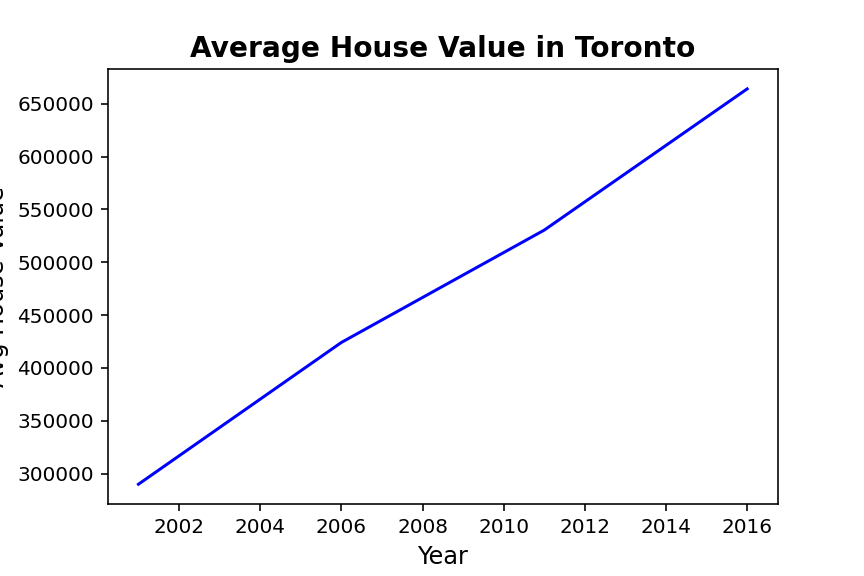
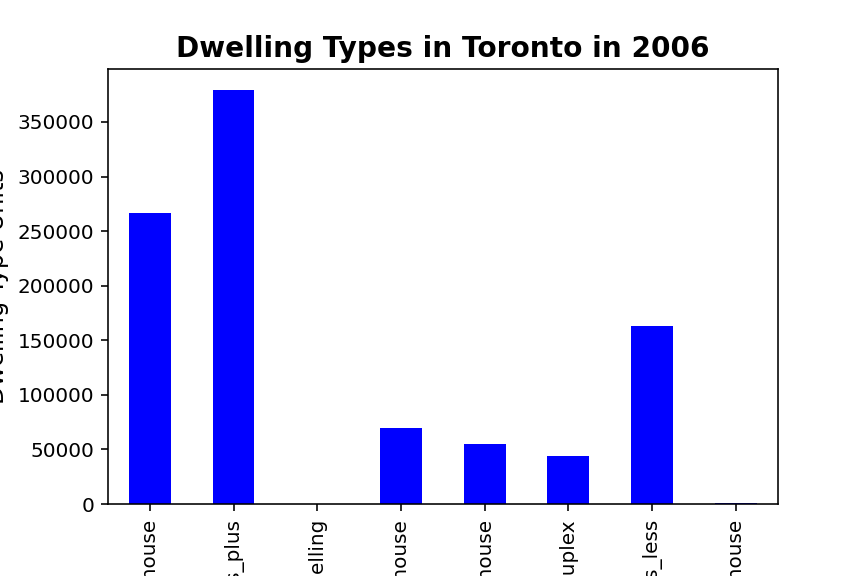
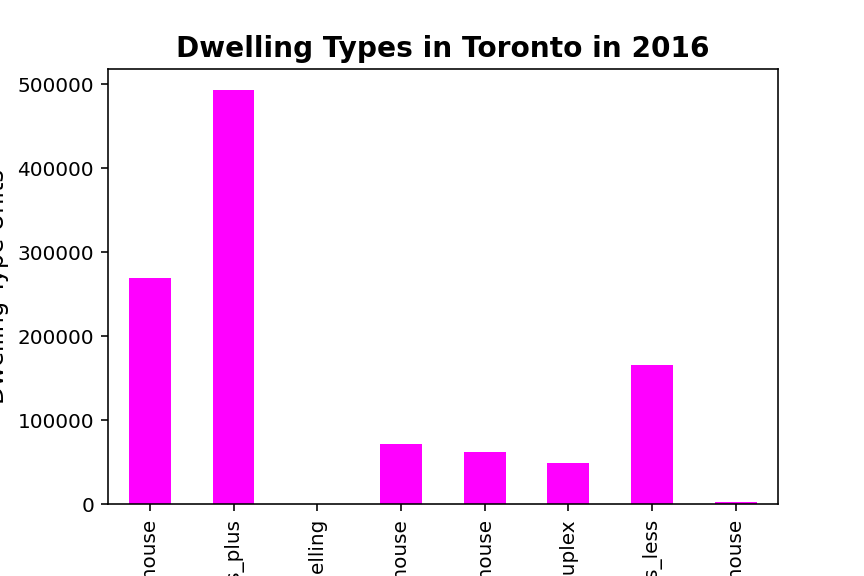
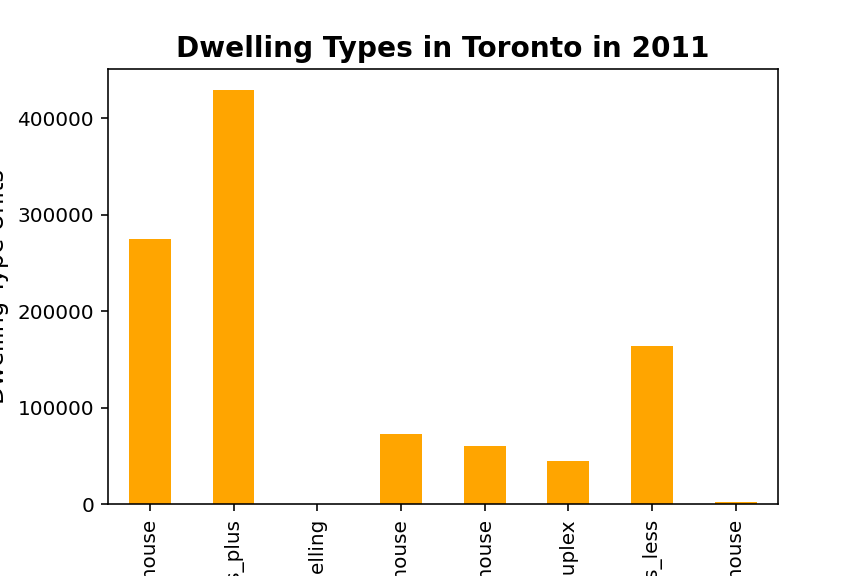
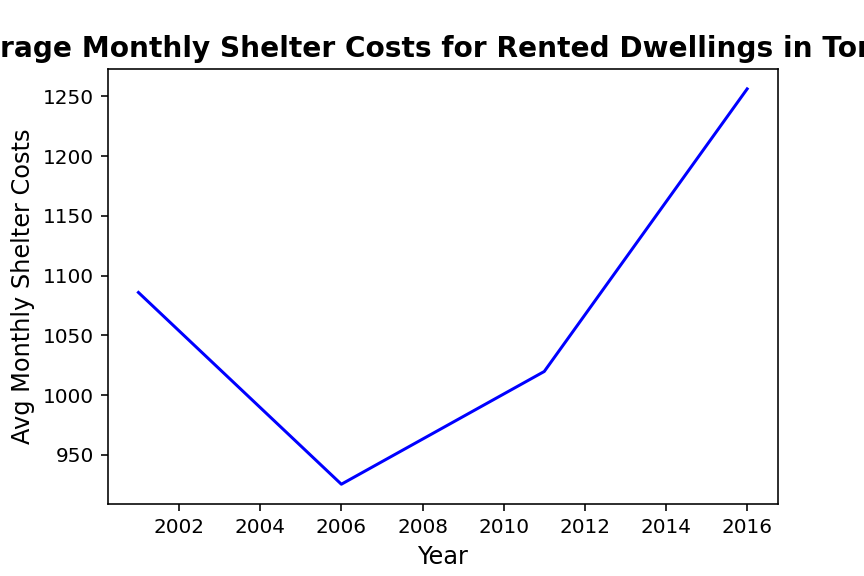
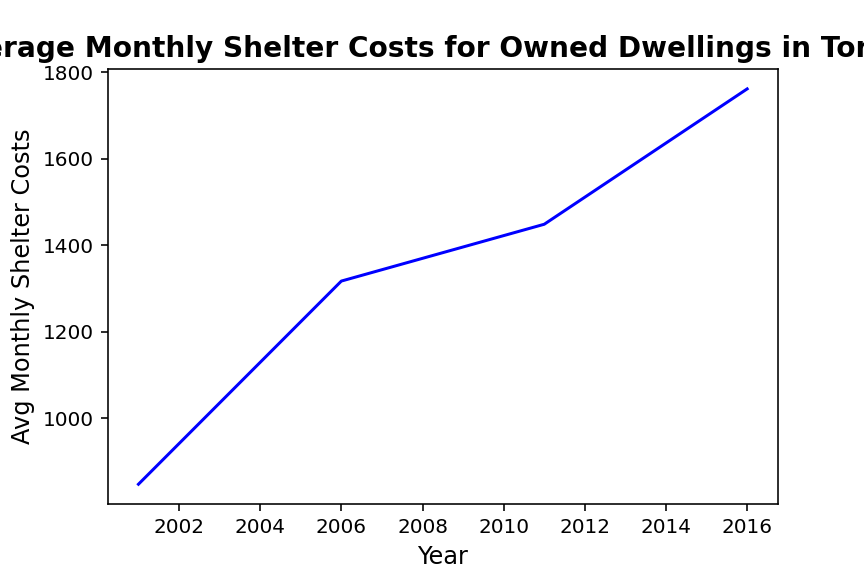
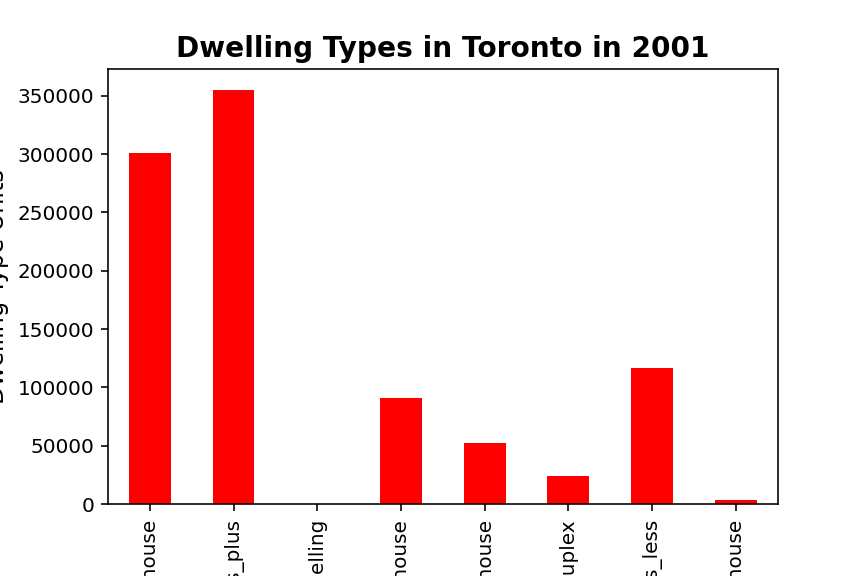

In [69]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

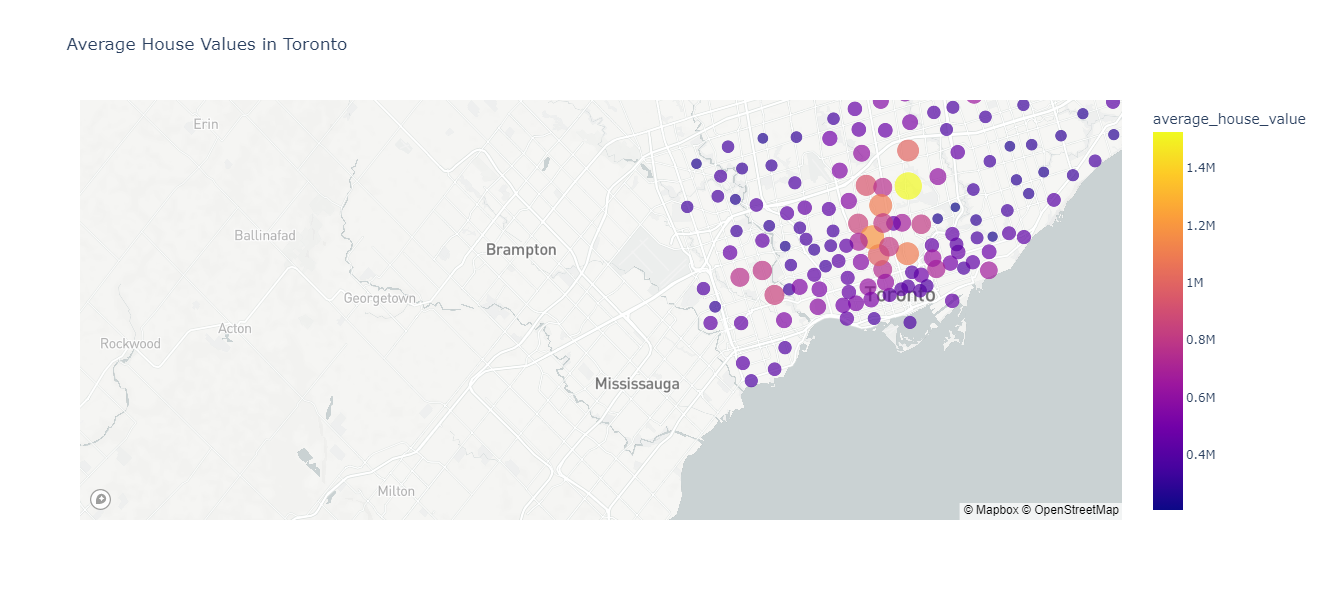

In [33]:
neighbourhood_map().

In [32]:
#ef create_bar_chart(data, title, xlabel, ylabel, color):
    #welling_type_per_year = to_data.groupby("year").sum()
    #welling_type_per_year.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"], inplace=True)
    
    #g = plt.figure()
    #ar_chart = data.plot.bar(color=color)
    #ar_chart.set_xlabel(xlabel, fontsize=12)
    #ar_chart.set_ylabel(ylabel, fontsize=12)
    #ar_chart.set_title(title, fontsize=14, fontweight="bold")    
    #t.close(fig)
    
    #return plt
# Bar chart for 2001
create_bar_chart(dwelling_type_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
create_bar_chart(dwelling_type_per_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# Bar chart for 2011
create_bar_chart(dwelling_type_per_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# Bar chart for 2016
create_bar_chart(dwelling_type_per_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")




<module 'matplotlib.pyplot' from 'C:\\Users\\Curtis\\anaconda3\\envs\\pyvizenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
# Bar chart for 2001
create_bar_chart(dwelling_type_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
create_bar_chart(dwelling_type_per_year.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# Bar chart for 2011
create_bar_chart(dwelling_type_per_year.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# Bar chart for 2016
create_bar_chart(dwelling_type_per_year.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")


<module 'matplotlib.pyplot' from 'C:\\Users\\Curtis\\anaconda3\\envs\\pyvizenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
def create_line_chart(data, title, xlabel, ylabel, color)

# Line chart for owned dwellings
create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

SyntaxError: invalid syntax (<ipython-input-17-6f1a1d746d19>, line 1)

In [47]:
average_house_value()

In [48]:
average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [49]:
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

<AxesSubplot:title={'center':'Average house value in Toronto'}, xlabel='Year', ylabel='Avg. House Value'>

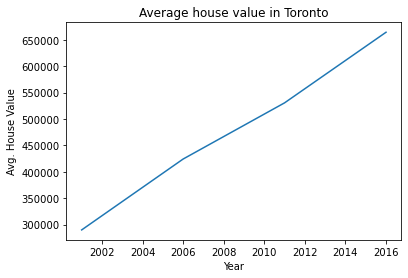

In [50]:
average_house_value_snapshot()

In [79]:
top_most_expensive_neighbourhoods()

NameError: name 'top_most_expensive_neighbourhoods' is not defined

In [23]:
# sunburts_cost_analysis()